# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

In [ ]:
# H0 (answer in words):


**H0**:Low levels of masculinity in male characters do not positively affects fanfiction success when controlling for publication year and lexical richness.

##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


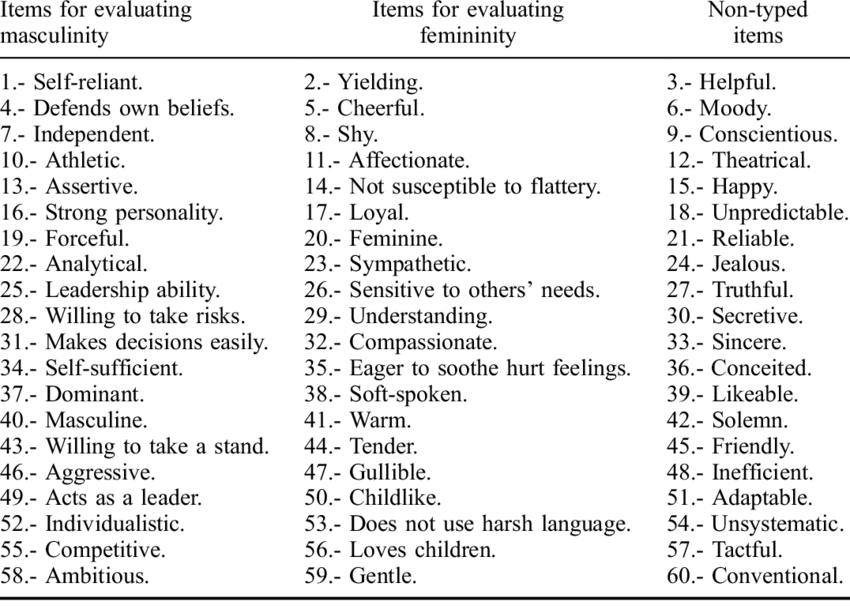

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [ ]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

In [6]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [8]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [10]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
# Create an empty dictionary called 'scores_dict'
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [11]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    texts = segments 
    riveter.train(texts,
             text_ids,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:38:15 Complete!
Story ID: 4706144, Masculine Power Score: 0.09090909090909091



  0%|          | 0/2 [00:00<?, ?it/s]

2024-03-14 14:38:33 Complete!
Story ID: 4752980, Masculine Power Score: 0.25



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:38:47 Complete!
Story ID: 4621698, Masculine Power Score: 0.5714285714285714



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:39:03 Complete!
Story ID: 3651108, Masculine Power Score: 0.11764705882352941



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:39:25 Complete!
Story ID: 5282729, Masculine Power Score: 0.2



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:39:39 Complete!
Story ID: 5533886, Masculine Power Score: 0.0



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:39:53 Complete!
Story ID: 4547622, Masculine Power Score: 0.05714285714285714



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:40:05 Complete!
Story ID: 16177508, Masculine Power Score: 0.13333333333333333



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:40:18 Complete!
Story ID: 15745185, Masculine Power Score: -0.10526315789473684



 33%|███▎      | 1/3 [00:07<00:14,  7.26s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:40:32 Complete!
Story ID: 15654528, Masculine Power Score: 0.18604651162790697



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:40:51 Complete!
Story ID: 7448155, Masculine Power Score: 0.325



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:41:08 Complete!
Story ID: 4983847, Masculine Power Score: 0.10344827586206896



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:41:25 Complete!
Story ID: 3313118, Masculine Power Score: -0.23333333333333334



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:41:40 Complete!
Story ID: 3290390, Masculine Power Score: -0.10638297872340426



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:41:59 Complete!
Story ID: 36435301, Masculine Power Score: 0.05555555555555555



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:42:15 Complete!
Story ID: 36575491, Masculine Power Score: 0.2631578947368421



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:42:31 Complete!
Story ID: 35225224, Masculine Power Score: 0.24324324324324326



  0%|          | 0/2 [00:00<?, ?it/s]

2024-03-14 14:42:47 Complete!
Story ID: 4594527, Masculine Power Score: 0.2222222222222222



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:43:07 Complete!
Story ID: 5485625, Masculine Power Score: 0.10909090909090909



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:43:23 Complete!
Story ID: 36408319, Masculine Power Score: 0.15789473684210525



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:43:42 Complete!
Story ID: 35762659, Masculine Power Score: 0.21428571428571427



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:44:00 Complete!
Story ID: 35603194, Masculine Power Score: 0.3684210526315789



  0%|          | 0/2 [00:00<?, ?it/s]

2024-03-14 14:44:17 Complete!
Story ID: 35344306, Masculine Power Score: 0.1388888888888889



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:44:36 Complete!
Story ID: 36695155, Masculine Power Score: 0.1



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:44:56 Complete!
Story ID: 36064474, Masculine Power Score: 0.1



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:45:17 Complete!
Story ID: 36024820, Masculine Power Score: 0.16666666666666666



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:45:41 Complete!
Story ID: 35182330, Masculine Power Score: 0.06818181818181818



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:45:55 Complete!
Story ID: 36567496, Masculine Power Score: 0.21052631578947367



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:46:10 Complete!
Story ID: 35560330, Masculine Power Score: 0.13333333333333333



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:46:25 Complete!
Story ID: 35877496, Masculine Power Score: 0.125



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:46:39 Complete!
Story ID: 35957410, Masculine Power Score: 0.2857142857142857



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:46:52 Complete!
Story ID: 30947654, Masculine Power Score: 0.04



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:47:06 Complete!
Story ID: 36332707, Masculine Power Score: -0.09523809523809523



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:47:22 Complete!
Story ID: 35967940, Masculine Power Score: 0.16071428571428573



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:47:37 Complete!
Story ID: 35001073, Masculine Power Score: 0.05



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:47:57 Complete!
Story ID: 35138911, Masculine Power Score: 0.1388888888888889



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:48:09 Complete!
Story ID: 35280397, Masculine Power Score: 0.22727272727272727



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:48:25 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708333333333333



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:48:40 Complete!
Story ID: 34995673, Masculine Power Score: 0.16363636363636364



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:49:00 Complete!
Story ID: 33477346, Masculine Power Score: 0.43333333333333335



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:49:14 Complete!
Story ID: 36840832, Masculine Power Score: -0.23076923076923078



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:49:28 Complete!
Story ID: 30896276, Masculine Power Score: 0.14285714285714285



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:49:39 Complete!
Story ID: 37363471, Masculine Power Score: 0.42857142857142855



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:49:52 Complete!
Story ID: 36984901, Masculine Power Score: 0.0



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:50:05 Complete!
Story ID: 33353644, Masculine Power Score: -0.05660377358490566



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:50:18 Complete!
Story ID: 37002835, Masculine Power Score: -0.14285714285714285



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:50:33 Complete!
Story ID: 5630824, Masculine Power Score: 0.3157894736842105



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:50:47 Complete!
Story ID: 10053617, Masculine Power Score: 0.25806451612903225



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:51:00 Complete!
Story ID: 1572659, Masculine Power Score: 0.23333333333333334



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:51:14 Complete!
Story ID: 7450573, Masculine Power Score: 0.1



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:51:33 Complete!
Story ID: 6918676, Masculine Power Score: 0.05263157894736842



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:51:52 Complete!
Story ID: 6075402, Masculine Power Score: 0.36363636363636365



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:52:06 Complete!
Story ID: 11101779, Masculine Power Score: 0.3333333333333333



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:52:22 Complete!
Story ID: 11321331, Masculine Power Score: 0.08108108108108109



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:52:35 Complete!
Story ID: 12284853, Masculine Power Score: 0.022222222222222223



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:52:50 Complete!
Story ID: 12282003, Masculine Power Score: 0.08888888888888889



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:53:02 Complete!
Story ID: 7613533, Masculine Power Score: 0



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:53:15 Complete!
Story ID: 4228053, Masculine Power Score: 0.21739130434782608



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:53:34 Complete!
Story ID: 12127317, Masculine Power Score: 0.13513513513513514



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:53:49 Complete!
Story ID: 12010134, Masculine Power Score: 0.21739130434782608



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:54:05 Complete!
Story ID: 11510919, Masculine Power Score: 0.4230769230769231



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:54:19 Complete!
Story ID: 8145802, Masculine Power Score: 0.22727272727272727



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:54:32 Complete!
Story ID: 6637942, Masculine Power Score: -0.13043478260869565



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:54:44 Complete!
Story ID: 7427905, Masculine Power Score: -0.02702702702702703



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:54:57 Complete!
Story ID: 3893857, Masculine Power Score: 0.1206896551724138



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:55:10 Complete!
Story ID: 33040258, Masculine Power Score: 0.25



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:55:25 Complete!
Story ID: 33858850, Masculine Power Score: -0.16666666666666666



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:55:38 Complete!
Story ID: 2775776, Masculine Power Score: 0.25



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:55:51 Complete!
Story ID: 3197963, Masculine Power Score: 0.3



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:56:04 Complete!
Story ID: 12395199, Masculine Power Score: 0.14634146341463414



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:56:16 Complete!
Story ID: 10934010, Masculine Power Score: 0.2962962962962963



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:56:28 Complete!
Story ID: 12301116, Masculine Power Score: 0.034482758620689655



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:56:43 Complete!
Story ID: 12706317, Masculine Power Score: -0.08695652173913043



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:56:58 Complete!
Story ID: 11499468, Masculine Power Score: 0.06896551724137931



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:57:10 Complete!
Story ID: 12184146, Masculine Power Score: 0.32



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:57:22 Complete!
Story ID: 12201333, Masculine Power Score: 0.12



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:57:37 Complete!
Story ID: 11496030, Masculine Power Score: 0.16



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:57:51 Complete!
Story ID: 11510277, Masculine Power Score: 0.16216216216216217



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:58:05 Complete!
Story ID: 10772274, Masculine Power Score: 0.3793103448275862



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:58:18 Complete!
Story ID: 12646050, Masculine Power Score: 0.041666666666666664



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:58:31 Complete!
Story ID: 11161479, Masculine Power Score: -0.013157894736842105



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:58:43 Complete!
Story ID: 12069936, Masculine Power Score: 0.061224489795918366



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:58:57 Complete!
Story ID: 12285972, Masculine Power Score: 0.41935483870967744



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:59:10 Complete!
Story ID: 12372702, Masculine Power Score: -0.03571428571428571



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:59:24 Complete!
Story ID: 12610496, Masculine Power Score: 0.1



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:59:38 Complete!
Story ID: 10970472, Masculine Power Score: 0.06060606060606061



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 14:59:53 Complete!
Story ID: 12084552, Masculine Power Score: 0.3157894736842105



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 15:00:08 Complete!
Story ID: 12727119, Masculine Power Score: 0.017543859649122806



  0%|          | 0/3 [00:00<?, ?it/s]

2024-03-14 15:00:21 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████| 90/90 [22:35<00:00, 15.07s/it]

2024-03-14 15:00:35 Complete!
Story ID: 10859508, Masculine Power Score: 0.24324324324324326


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [12]:
# Q2 (code)
print(df.head())

   story_id  published_year  words  kudos  comments  \
0   4706144            2015   1185  249.0       1.0   
1   4752980            2015   1164   79.0       NaN   
3   4621698            2015   1016  105.0       4.0   
5   3651108            2015   1174  339.0       6.0   
7   5282729            2015   1173   17.0       NaN   

                                       story_content  masculine_power_score  
0  library snacks & 3AM promises\n\nAuthor's Note...               0.090909  
1  Worry\n\nYou stumbled through the apartment do...               0.250000  
3  Mornings\n\nThis is literally trash omg what I...               0.571429  
5  Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...               0.117647  
7  Unspoken Words\n\nYou come back into the flat,...               0.200000  


In [ ]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
df.to_csv('/content/df.csv', index=False)

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [14]:
!pip install lexicalrichness

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lexicalrichness: filename=lexicalrichness-0.5.1-py3-none-any.whl size=15416 sha256=21e1f432e857dc26e16696b45a330b05b1077618137fbe022d8935abf82b530e
  Stored in directory: /Users/xumingkai/Library/Caches/pip/wheels/bb/68/f4/1a32ae0aae29ce426b4e3c106a4e8e9c19fd13bcaff45c6a8e
Successfully built lexicalrichness


In [15]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.090909,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.250000,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.571429,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.117647,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.200000,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `words` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


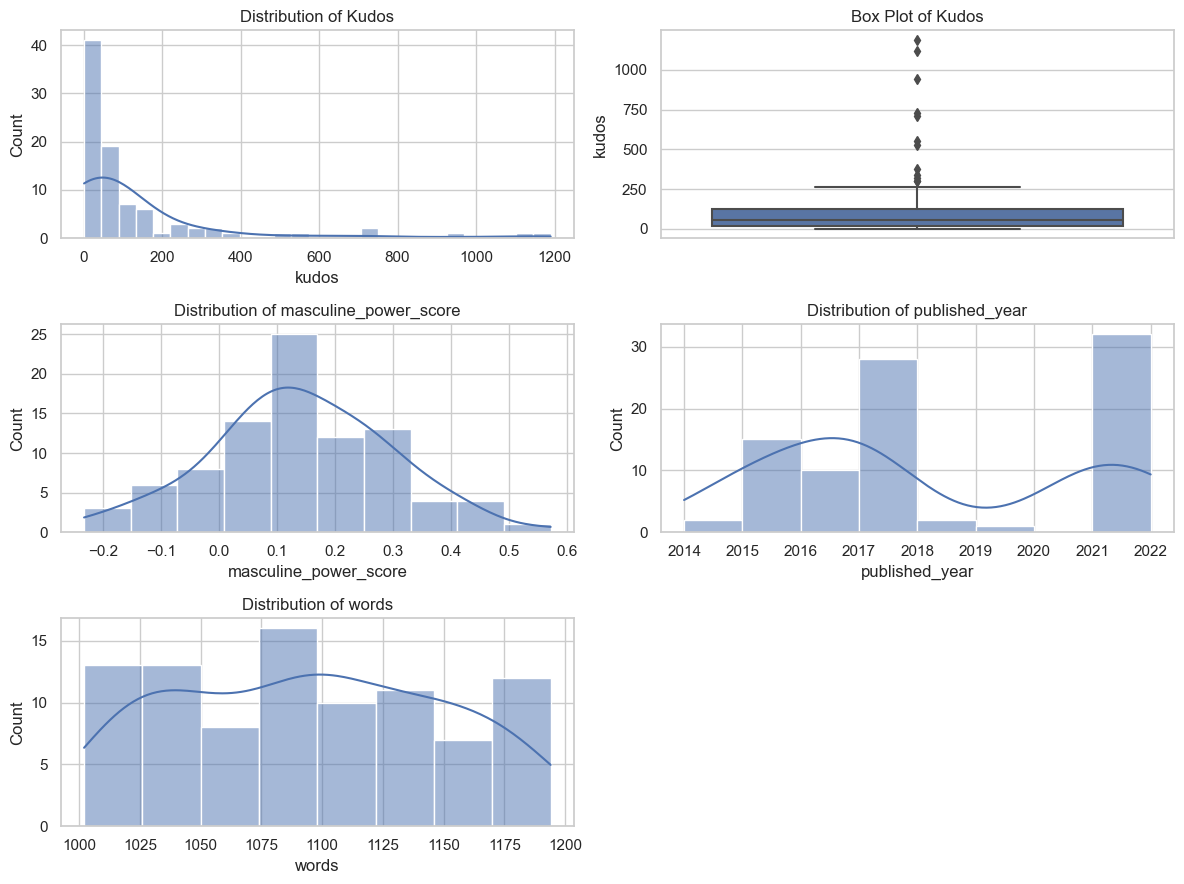

In [18]:
# Q3a (code): Check data distribution

sns.set(style="whitegrid")

# layout 
plt.figure(figsize=(12, 9))

# distribution of dependent variable 'kudos'
plt.subplot(3, 2, 1)  
sns.histplot(df['kudos'], kde=True)
plt.title('Distribution of Kudos')

plt.subplot(3, 2, 2)  
sns.boxplot(y=df['kudos'])
plt.title('Box Plot of Kudos')

# distribution of independent variable
variables = ['masculine_power_score', 'published_year', 'words']

for i, var in enumerate(variables, start=3): 
    plt.subplot(3, 2, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout() 
plt.show()

In [20]:
# Q3b (code): compute some descriptive statistics
descriptive_stats = df[['kudos', 'masculine_power_score', 'published_year', 'words']].describe()
print(descriptive_stats)

             kudos  masculine_power_score  published_year        words
count    89.000000              90.000000       90.000000    90.000000
mean    135.393258               0.139553     2018.088889  1094.344444
std     229.972311               0.155706        2.612177    55.327048
min       1.000000              -0.233333     2014.000000  1002.000000
25%      20.000000               0.050658     2016.000000  1042.250000
50%      54.000000               0.134234     2017.000000  1095.000000
75%     122.000000               0.243243     2021.000000  1141.750000
max    1190.000000               0.571429     2022.000000  1194.000000


In [21]:
# Q3c (code): Check for any missing values
missing_values_count = df.isnull().sum()
print(missing_values_count)

story_id                  0
published_year            0
words                     0
kudos                     1
comments                 25
story_content             0
masculine_power_score     0
lexical_richness          0
dtype: int64


In [22]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True)
missing_values_count_after_filling = df.isnull().sum()
print(missing_values_count_after_filling)

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64


It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

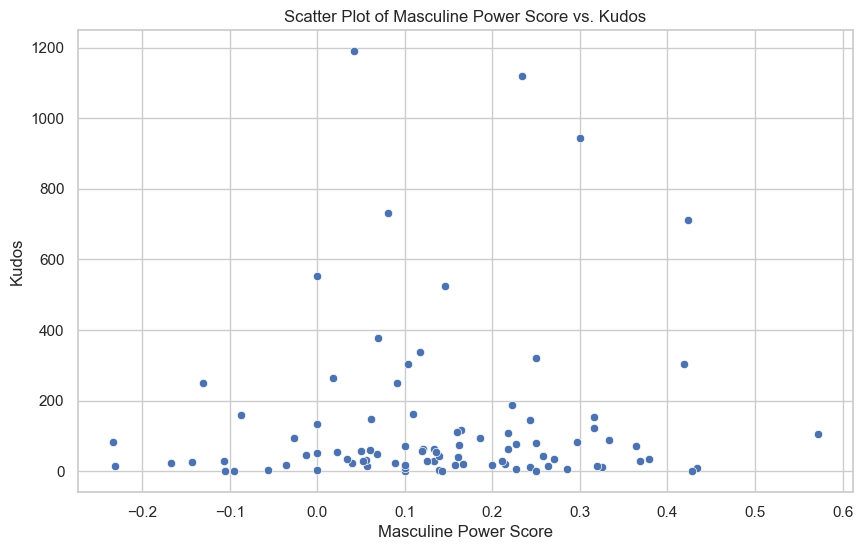

In [23]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='masculine_power_score', y='kudos', data=df)

plt.title('Scatter Plot of Masculine Power Score vs. Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')

plt.show()

**Q5. Multiple Regression and Analysis**

In [25]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
import statsmodels.api as sm

y = df['kudos']
X = df[['masculine_power_score', 'published_year', 'words']]
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.651
Date:                Thu, 14 Mar 2024   Prob (F-statistic):            0.00139
Time:                        16:13:06   Log-Likelihood:                -608.19
No. Observations:                  90   AIC:                             1224.
Df Residuals:                      86   BIC:                             1234.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.985e+

**Q6. Interpret the results of the regression analysis**

In [ ]:
# Q6a (words): Interpret the R-squared and Adj. R-squared

**A6a**:An R-squared value of 0.165 means that approximately 16.5% of the variation in kudos can be explained by the model.An Adjusted R-squared of 0.136 suggests that after adjusting for the number of predictors, around 13.6% of the variance in kudos is explained by the model. 

In [26]:
# Q6b (words): Interpret F-test result

**A6b**:The F-test result with a p-value of 0.00139 suggests that the regression model is statistically significant, indicating that at least one of the independent variables meaningfully contributes to predicting the dependent variable, `kudos`.

In [ ]:
# Q6c (words): Interpret coefficients and t-test result

**A6c**:
**const (6.985e+04)**: This is the intercept term.  It represents the expected value of `kudos` when all independent variables are zero.  In this model, it suggests that if `masculine_power_score`, `published_year`, and `words` are all zero, the expected `kudos` would be approximately 69,850.

**masculine_power_score (77.4713)**: For each one-unit increase in `masculine_power_score`, `kudos` is expected to increase by 77.47, holding other variables constant. However, its p-value is just 0.596, indicates that this effect is not statistically significant at common significance levels.

**published_year (-34.3797)**: For each one-year increase in `published_year`, `kudos` is expected to decrease by 34.38, holding other variables constant. The p-value (<0.001) suggests this effect is statistically significant, meaning changes in published_year are associated with changes in kudos.

**words (-0.3175)**: For each additional `word` in the story, `kudos` is expected to decrease by approximately 0.32, holding other variables constant.  The p-value (0.439) indicates that this effect is not statistically significant.

**masculine_power_score**: The t-value is 0.533 with a p-value of 0.596.   This high p-value suggests that the coefficient for `masculine_power_score` is not significantly different from zero, implying it may not have a meaningful impact on `kudos`.
**published_year**: The t-value is -3.968 with a p-value close to 0.000, indicating strong evidence against the null hypothesis (which states there is no effect). This suggests the `published_year` significantly affects `kudos`.
**words**: The t-value is -0.777 with a p-value of 0.439, indicating the coefficient for `words` is not significantly different from zero at common levels of significance, suggesting it may not have a meaningful effect on `kudos`.

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [28]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from scipy import stats
residuals = model.resid
shapiro_test = stats.shapiro(residuals)

print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

Shapiro-Wilk Test:
Test Statistic: 0.6960538625717163
P-value: 2.3473965826692478e-12


In [ ]:
# Q7b (words): Write your analysis for the Normality Test there:


**A7b**:Test Statistic(0.696) and the extremely low p-value strongly suggests that the data do not follow a normal distribution, indicating evidence against the null hypothesis, suggesting a need for further investigation or model adjustment.

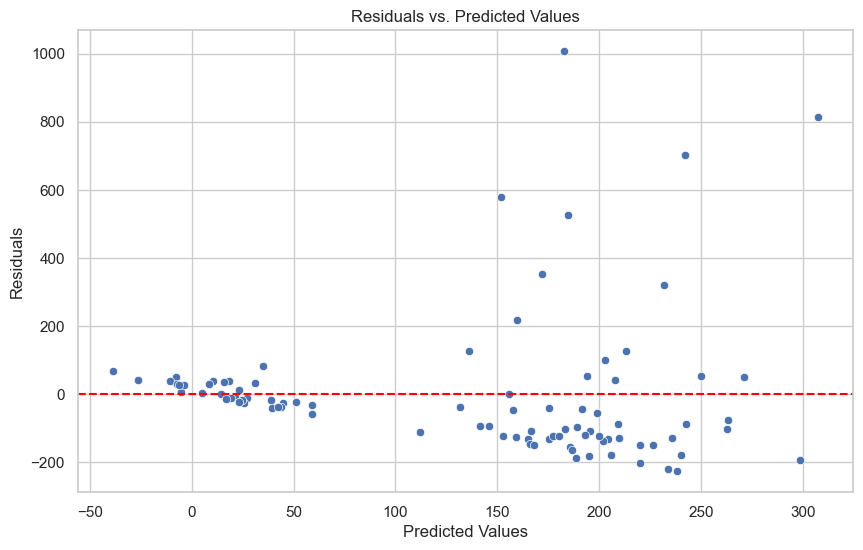

In [29]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
predicted_values = model.predict()

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predicted_values, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Adding a horizontal line at 0 for reference
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

In [ ]:
# Q7d (words): Write your analysis for the Homoscedasticity Test here:


**A7d**:Overall, the plot shows the data are not around the 0 line, which indicates that model is heteroscedasticity

**Q8: Multicollinearity**

In [30]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature            VIF
0                  const  606665.119079
1  masculine_power_score       1.006348
2         published_year       1.004453
3                  words       1.001894


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

In [ ]:
# Q8b (words): Write your analysis for the multicollinearity test here:


**A8b**:All the independent variables have VIF values very close to 1,show that there is no evidence of multicollinearity among the independent variables

**Q9: Reflection**

In [ ]:
# Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?


**A9**:Given that the model exhibits heteroscedasticity and there is a violation of the assumption of normality, caution is warranted in interpreting the regression results, especially concerning the significance of the predictor variables.

The adjusted R-squared value suggests the model only explains a small portion (about 13.6%) of the variance in the dependent variable (kudos). This indicates that there are other variables not included in the model that may significantly affect the success of fanfiction.Shapiro-Wilk test indicates that the residuals of the model do not follow a normal distribution, suggesting a need for further investigation or model adjustment.

And also, we only identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`, this approach may have limitations, the measures of success and quantification of masculinity levels may need further refinement.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.